<a href="https://colab.research.google.com/github/MLEngDeena/M.Tech-Project/blob/main/Project_Step3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gesture Recognition Using CSI Data

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.8.2


In [ ]:
!pip install matplotlib

In [ ]:
!pip install -U scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Load the Dataset 

In [ ]:
data = pd.read_csv('FinalData.csv')
del data['Unnamed: 0']
print(data.shape)
data.head()

(343416, 5)


,activity,time,pca1,pca2,pca3
0,Drawing B,49105962326000,-0.694638,12.680544,0.503953
1,Drawing B,49106062271000,5.012288,11.264028,0.953424
2,Drawing B,49106112167000,4.903325,10.882658,-0.081722
3,Drawing B,49106222305000,-0.612916,18.496431,3.023717
4,Drawing B,49106332290000,-1.184970,12.108489,7.205164


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   activity  343416 non-null  object 
 1   time      343416 non-null  int64  
 2   pca1      343416 non-null  float64
 3   pca2      343416 non-null  float64
 4   pca3      343416 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 13.1+ MB


In [ ]:
data.isnull().sum()

activity    0
time        0
pca1        0
pca2        0
pca3        0
dtype: int64

In [ ]:
data['activity'].value_counts()

Drawing A     137375
Drawing B     129392
Drawing D      35137
Drawing C      33358
Drawing E       4599
No Gesture      3555
Name: activity, dtype: int64

### Balance this data 

In [ ]:
data['pca1'] = data['pca1'].astype('float')
data['pca2'] = data['pca2'].astype('float')
data['pca3'] = data['pca3'].astype('float')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   activity  343416 non-null  object 
 1   time      343416 non-null  int64  
 2   pca1      343416 non-null  float64
 3   pca2      343416 non-null  float64
 4   pca3      343416 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 13.1+ MB


In [ ]:
Fs = 20
activities = data['activity'].value_counts().index
activities

Index(['Drawing A', 'Drawing B', 'Drawing D', 'Drawing C', 'Drawing E',
       'No Gesture'],
      dtype='object')

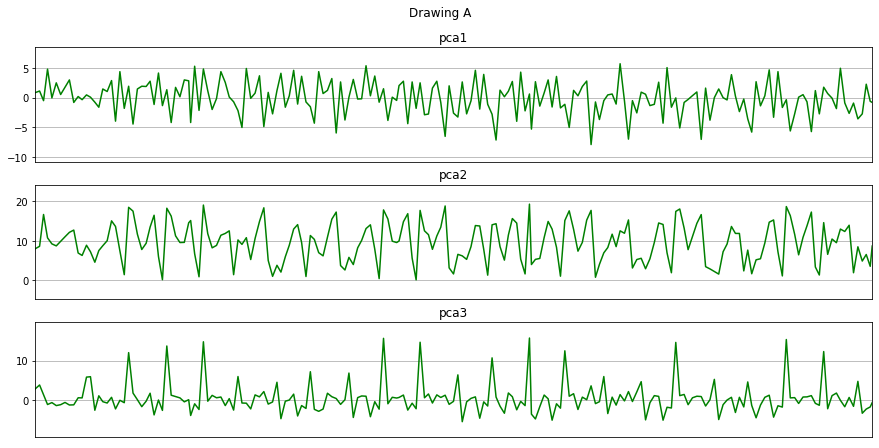

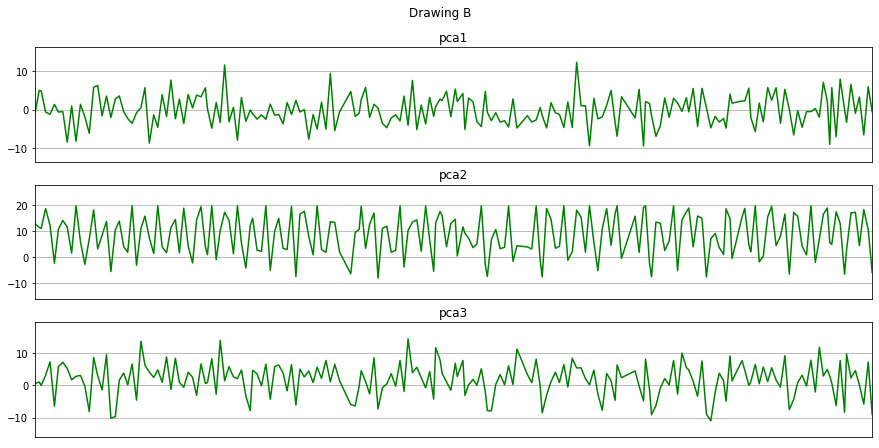

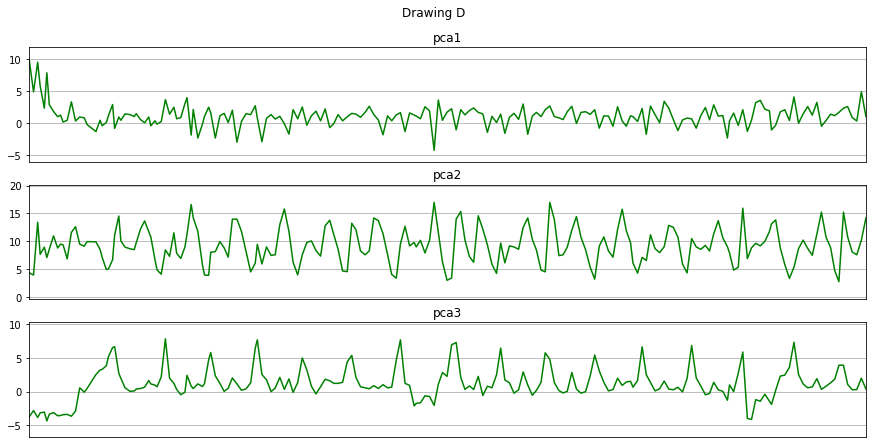

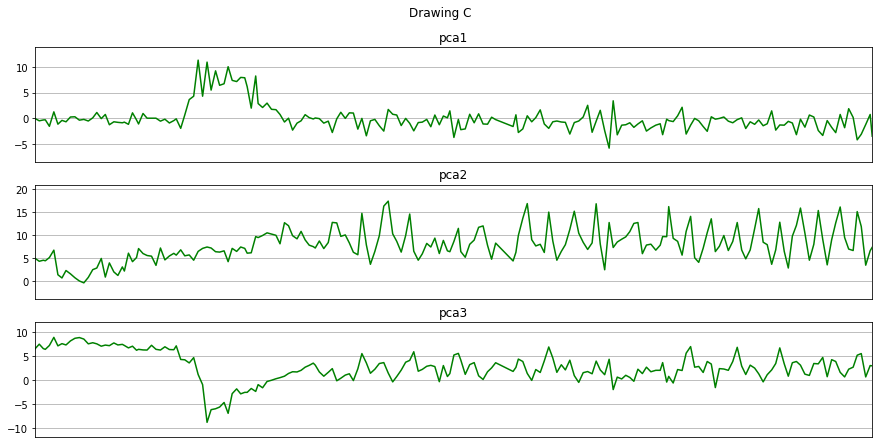

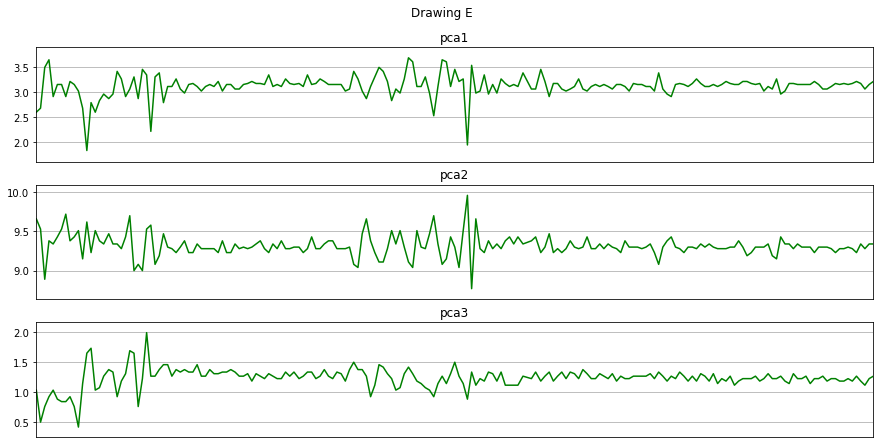

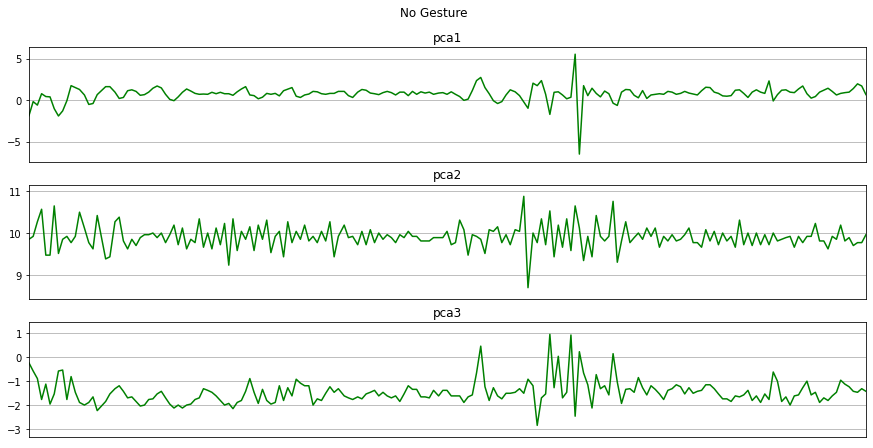

In [ ]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['pca1'], 'pca1')
    plot_axis(ax1, data['time'], data['pca2'], 'pca2')
    plot_axis(ax2, data['time'], data['pca3'], 'pca3')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [ ]:
df = data.drop(['time'], axis = 1).copy()
df.head()

,activity,pca1,pca2,pca3
0,Drawing B,-0.694638,12.680544,0.503953
1,Drawing B,5.012288,11.264028,0.953424
2,Drawing B,4.903325,10.882658,-0.081722
3,Drawing B,-0.612916,18.496431,3.023717
4,Drawing B,-1.184970,12.108489,7.205164


In [ ]:
df['activity'].value_counts()

Drawing A     137375
Drawing B     129392
Drawing D      35137
Drawing C      33358
Drawing E       4599
No Gesture      3555
Name: activity, dtype: int64

In [ ]:
Drawing_A = df[df['activity']=='Drawing A'].head(3555).copy()
Drawing_B = df[df['activity']=='Drawing B'].head(3555).copy()
Drawing_C = df[df['activity']=='Drawing C'].head(3555).copy()
Drawing_D = df[df['activity']=='Drawing D'].head(3555).copy()
Drawing_E = df[df['activity']=='Drawing E'].head(3555).copy()
No_Gesture = df[df['activity']=='No Gesture'].head(3555).copy()


In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Drawing_A, Drawing_B, Drawing_C, Drawing_D, Drawing_E, No_Gesture])
balanced_data.shape

(21330, 4)

In [ ]:
balanced_data['activity'].value_counts()

Drawing A     3555
Drawing B     3555
Drawing C     3555
Drawing D     3555
Drawing E     3555
No Gesture    3555
Name: activity, dtype: int64

In [ ]:
balanced_data.head()

,activity,pca1,pca2,pca3
597,Drawing A,0.844462,8.008764,2.792171
598,Drawing A,1.116869,8.621680,3.786457
599,Drawing A,-0.503953,16.657684,1.307553
600,Drawing A,4.794363,10.760075,-1.184970
601,Drawing A,-0.040861,9.234595,-0.694638


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,pca1,pca2,pca3,label
597,Drawing A,0.844462,8.008764,2.792171,0
598,Drawing A,1.116869,8.621680,3.786457,0
599,Drawing A,-0.503953,16.657684,1.307553,0
600,Drawing A,4.794363,10.760075,-1.184970,0
601,Drawing A,-0.040861,9.234595,-0.694638,0


In [ ]:
label.classes_

array(['Drawing A', 'Drawing B', 'Drawing C', 'Drawing D', 'Drawing E',
       'No Gesture'], dtype=object)

### Standardized data 

In [ ]:
X = balanced_data[['pca1', 'pca2', 'pca3']]
y = balanced_data['label']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['pca1', 'pca2', 'pca3'])
scaled_X['label'] = y.values

scaled_X

,pca1,pca2,pca3,label
0,0.000503,-0.099190,0.337933,0
1,0.073590,0.020386,0.633446,0
2,-0.361275,1.588160,-0.103312,0
3,1.060258,0.437573,-0.844119,0
4,-0.237028,0.139962,-0.698386,0
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,5
21326,-0.542658,0.193692,0.248875,5
21327,-0.628514,0.197593,0.261019,5
21328,-0.781444,0.049322,0.155768,5


### Frame Preparation 

In [ ]:
import scipy.stats as stats
Fs = 20 #Number of Rows of data generated in one Second
frame_size = Fs*4 # 80 , Considering that my activity will be completed in 4 Seconds
hop_size = Fs*2 # 40 , Skipping every 2 seconds

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['pca1'].values[i: i + frame_size]
        y = df['pca2'].values[i: i + frame_size]
        z = df['pca3'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [ ]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [ ]:
X.shape, y.shape

((532, 80, 3), (532,))

In [ ]:
(3555*6)/40

533.25

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [ ]:
X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)

In [ ]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [ ]:
print(X_test[0])

[[[ 0.64859022]
  [ 0.63517527]
  [ 0.64859022]]

 [[ 0.61907732]
  [ 0.63517527]
  [ 0.63517527]]

 [[ 0.63517527]
  [ 0.61907732]
  [ 0.63517527]]

 [[ 0.63517527]
  [ 0.6244433 ]
  [ 0.63517527]]

 [[ 0.65932219]
  [ 0.6244433 ]
  [ 0.6244433 ]]

 [[ 0.61907732]
  [ 0.63517527]
  [ 0.65932219]]

 [[ 0.63517527]
  [ 0.6244433 ]
  [ 0.6244433 ]]

 [[ 0.6244433 ]
  [ 0.63517527]
  [ 0.6244433 ]]

 [[ 0.64859022]
  [ 0.60834536]
  [ 0.63517527]]

 [[ 0.63517527]
  [ 0.64859022]
  [ 0.63517527]]

 [[ 0.63517527]
  [ 0.56810049]
  [ 0.63517527]]

 [[ 0.6244433 ]
  [ 0.58419844]
  [ 0.63517527]]

 [[ 0.64859022]
  [ 0.65932219]
  [ 0.63517527]]

 [[ 0.63517527]
  [ 0.6244433 ]
  [ 0.6244433 ]]

 [[ 0.60834536]
  [ 0.6244433 ]
  [ 0.6244433 ]]

 [[ 0.6244433 ]
  [ 0.63517527]
  [ 0.63517527]]

 [[ 0.61907732]
  [ 0.61907732]
  [ 0.6244433 ]]

 [[ 0.63517527]
  [ 0.64859022]
  [ 0.6244433 ]]

 [[ 0.63517527]
  [ 0.61907732]
  [ 0.6244433 ]]

 [[ 0.6244433 ]
  [ 0.6244433 ]
  [ 0.63517527]]



In [ ]:
print(type(X_test[0]))

<class 'numpy.ndarray'>


### 2D CNN Model 

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, validation_data= (X_test, y_test), verbose=1)

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

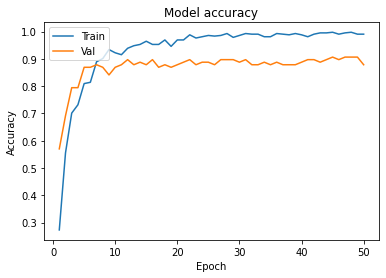

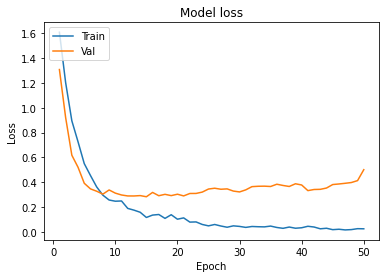

In [ ]:
plot_learningCurve(history, 50)

In [ ]:
data = pd.read_csv('/content/b.csv')
del data['Activity']
print(data.shape)
print(data.head())
print(type(data))
#data = data.reshape(80,3,1)
data = data.to_numpy()
print(data)
data = data.reshape(1,80, 3, 1)
print(data)
print(type(data),data.shape)

In [ ]:
yhat = model.predict(data)
print(yhat)
print(type(yhat))
print(np.sum(yhat))

[[1.5216608e-25 1.0000000e+00 7.3187021e-37 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
<class 'numpy.ndarray'>
1.0


In [ ]:
a = float(yhat[0][1])
print (a)

1.0


In [ ]:
def percentage(part, whole):
  return 100 * float(part)/float(whole)


In [ ]:
for i in range (6):
  part = yhat[0][i]
  whole = 1
  print(percentage(part,whole))

1.5216607939149102e-23
100.0
7.318702067891163e-35
0.0
0.0
0.0


In [ ]:
index = np.where(yhat == np.amax(yhat))
print(index[1][0])
print(type(index[1]))
print(type(index[1][0]))

1
<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [ ]:
MappingOfActivity = {
  "0": "You Draw A",
  "1": "You Draw B",
  "2": "You Draw C",
  "3": "You Draw D",
  "4": "You Draw E",
  "5": "Not Able to Recognise this Time"
}

In [ ]:
integer = index[1][0]
string = str(integer)
string

'1'

In [ ]:
print(MappingOfActivity[string])

You Draw B


In [ ]:
x = MappingOfActivity[string]

In [ ]:
import firebase_admin
! pip install --user firebase-admin

In [ ]:
#https://gesturerecognition-1e6b3-default-rtdb.firebaseio.com/
import firebase_admin
from firebase_admin import credentials
databaseURL = "https://gesturerecognition-1e6b3-default-rtdb.firebaseio.com/" #upload a file of key
cred = credentials.Certificate("/content/gesturerecognition-1e6b3-firebase-adminsdk-pyhc2-d9b0c3cf17.json")
firebase_admin.initialize_app(cred,{'databaseURL':databaseURL})

In [ ]:
from firebase_admin import db

In [ ]:
ref = db.reference("/WiFi_Sensing/")
value = ref.get()
print(value)
#x = "this is current one"
ref.update({"Gesture_Recognition": x})
ref = db.reference("/WiFi_Sensing/")
value = ref.get()
print(value)

{'Gesture1': 'You Draw A', 'Gesture2': 'No Activity', 'Gesture3': 'You Draw E', 'Gesture4': 'You Draw A', 'Gesture5': 'You Draw A', 'Gesture6': 'No Activity', 'Gesture_Recognition': 'You Draw B'}
{'Gesture1': 'You Draw A', 'Gesture2': 'No Activity', 'Gesture3': 'You Draw E', 'Gesture4': 'You Draw A', 'Gesture5': 'You Draw A', 'Gesture6': 'No Activity', 'Gesture_Recognition': 'You Draw 2'}
